In [1]:
import math

In [2]:
import pandas as pd

In [3]:
import pandas_datareader as web

In [4]:
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Dense, LSTM

In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly



In [11]:
!pip install yfinance
import yfinance as yf

#get stock dataset
df = yf.download('AAPL', start='2022-01-01', end='2024-12-12')
#showing apple most recent dataset
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-01-03,179.076584,182.009995,182.880005,177.710007,177.830002,104487900
2022-01-04,176.803833,179.699997,182.940002,179.119995,182.630005,99310400
2022-01-05,172.100861,174.919998,180.169998,174.639999,179.610001,94537600
2022-01-06,169.227921,172.000000,175.300003,171.639999,172.699997,96904000
2022-01-07,169.395187,172.169998,174.139999,171.029999,172.889999,86709100
...,...,...,...,...,...,...
2024-12-05,243.039993,243.039993,244.539993,242.130005,243.990005,40033900
2024-12-06,242.839996,242.839996,244.630005,242.080002,242.910004,36870600


In [12]:
df.shape

(740, 6)

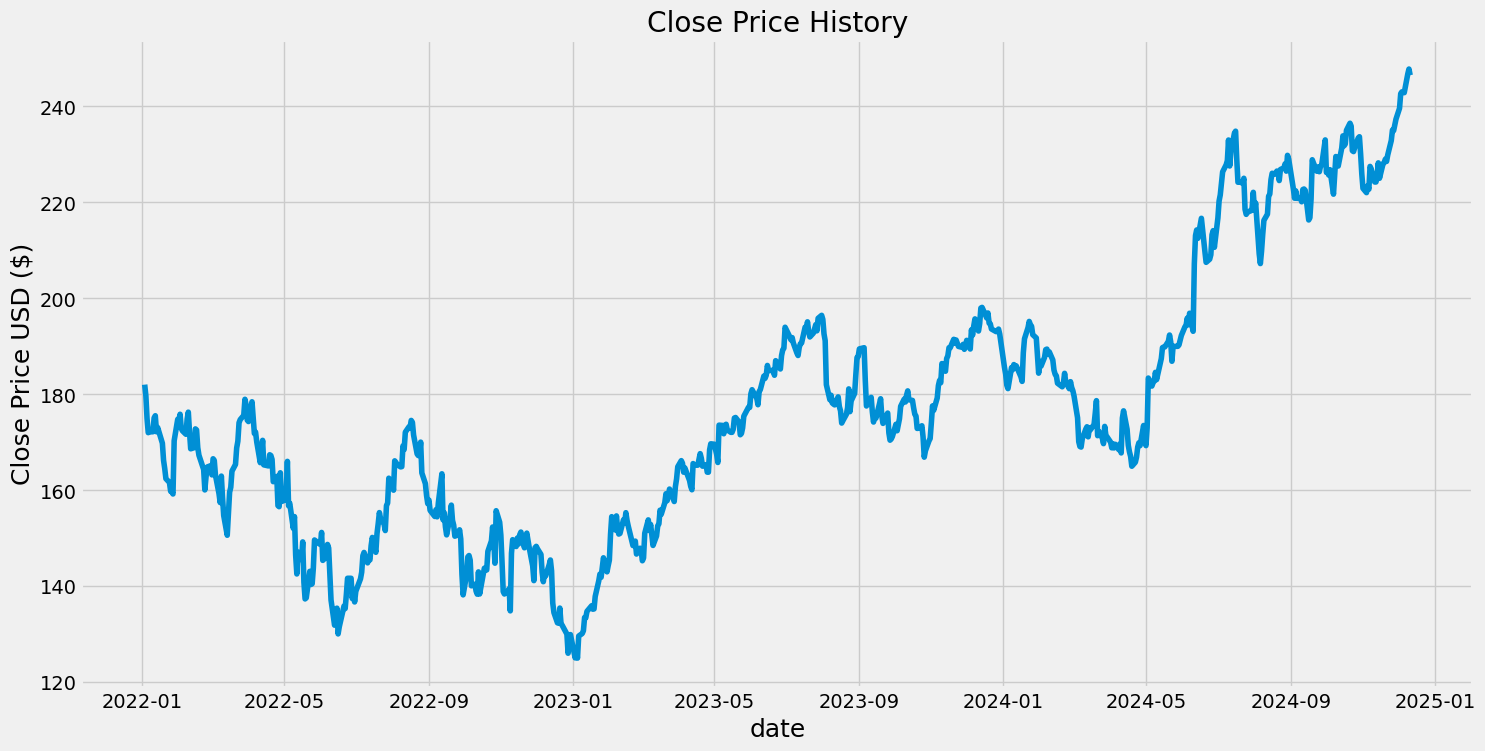

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
data = df.filter(['Close'])

In [15]:
dataset = data.values

In [16]:
training_data_len = math.ceil(len(dataset) * .8)

In [17]:
training_data_len

592

In [18]:
# Instead of:
# data = df.filter(['Close'])

# Try this:
data = df[['Close']]  # Use double brackets to select the 'Close' column as a DataFrame

# Alternatively, if you need it as a Series:
# data = df['Close']

# The rest of your code should remain the same:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
Scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = Scaler.fit_transform(dataset)

In [19]:
scaled_data

array([[4.64276939e-01],
       [4.45458223e-01],
       [4.06517299e-01],
       [3.82729128e-01],
       [3.84114042e-01],
       [3.84277009e-01],
       [4.07820791e-01],
       [4.11486754e-01],
       [3.84277009e-01],
       [3.91446091e-01],
       [3.64806547e-01],
       [3.35722986e-01],
       [3.21710757e-01],
       [3.04602890e-01],
       [2.98166975e-01],
       [2.83177189e-01],
       [2.82444022e-01],
       [2.78615091e-01],
       [3.69124256e-01],
       [4.05376774e-01],
       [4.03991861e-01],
       [4.14012192e-01],
       [3.90061053e-01],
       [3.85906312e-01],
       [3.79959300e-01],
       [4.05784131e-01],
       [4.17596733e-01],
       [3.83706685e-01],
       [3.55356416e-01],
       [3.57311654e-01],
       [3.89164918e-01],
       [3.87209804e-01],
       [3.57311654e-01],
       [3.44439949e-01],
       [3.20163000e-01],
       [2.85539784e-01],
       [3.07291295e-01],
       [3.24480709e-01],
       [3.26680212e-01],
       [3.11038680e-01],


In [20]:
train_data = scaled_data[0:training_data_len, :]

In [21]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
           print(x_train)
           print(y_train)
           print()

[array([0.46427694, 0.44545822, 0.4065173 , 0.38272913, 0.38411404,
       0.38427701, 0.40782079, 0.41148675, 0.38427701, 0.39144609,
       0.36480655, 0.33572299, 0.32171076, 0.30460289, 0.29816698,
       0.28317719, 0.28244402, 0.27861509, 0.36912426, 0.40537677,
       0.40399186, 0.41401219, 0.39006105, 0.38590631, 0.3799593 ,
       0.40578413, 0.41759673, 0.38370668, 0.35535642, 0.35731165,
       0.38916492, 0.3872098 , 0.35731165, 0.34443995, 0.320163  ,
       0.28553978, 0.3072913 , 0.32448071, 0.32668021, 0.31103868,
       0.33841139, 0.33572299, 0.31079429, 0.27926684, 0.26411408,
       0.30900202, 0.27291247, 0.24203664, 0.20855395, 0.24496943,
       0.28162931, 0.29002034, 0.31739305, 0.32879842, 0.35682288,
       0.3681467 , 0.39959273, 0.404888  , 0.41205708, 0.43942979])]
[0.42973526966007825]

[array([0.46427694, 0.44545822, 0.4065173 , 0.38272913, 0.38411404,
       0.38427701, 0.40782079, 0.41148675, 0.38427701, 0.39144609,
       0.36480655, 0.33572299, 0.32

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(532, 60, 1)

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

532/532 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - loss: 0.0077


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [28]:
x_test = np.array(x_test)

In [29]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
predictions = model.predict(x_test)
predictions = Scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


In [31]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

In [32]:
rmse

7.781455715212456

<ipython-input-33-a5aae99a23f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


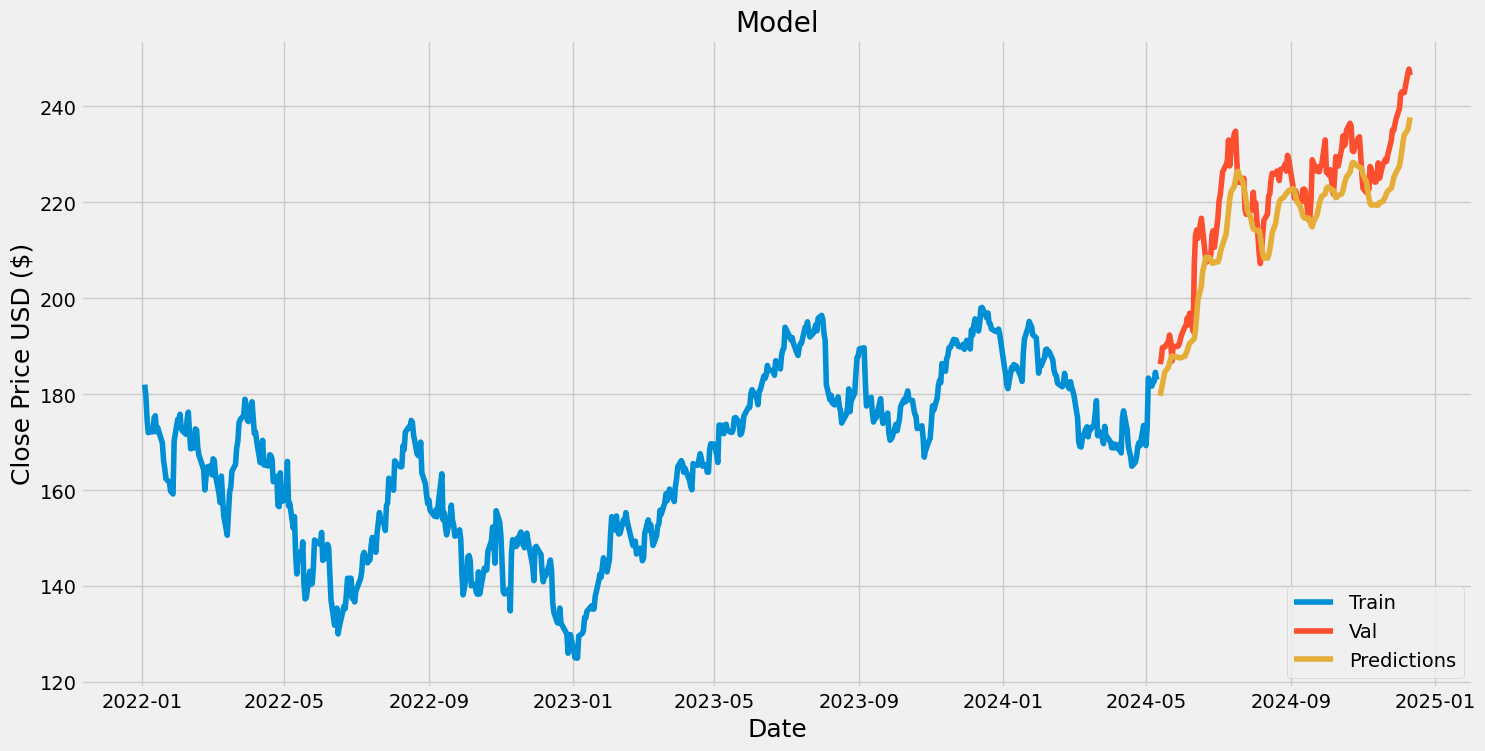

In [33]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
#Showing prices and predictions

In [35]:
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-05-13,186.279999,179.684265
2024-05-14,187.429993,180.938065
2024-05-15,189.720001,182.145493
2024-05-16,189.839996,183.449646
2024-05-17,189.869995,184.644547
...,...,...
2024-12-05,243.039993,232.592606
2024-12-06,242.839996,234.038467
